In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

#### Importar datos crudos 

In [7]:
ruta = '/home/jose/data/chicago/'

In [12]:
lst_arch = os.listdir(ruta)
lst_arch = [x for x in lst_arch if x[:3]=='chi']

In [16]:
%%time
for i,arch in enumerate(lst_arch):
    print (arch)
    aux = pd.read_csv(os.path.join(ruta,arch))
    if i == 0:
        df = aux.copy()
    else:
        df = pd.concat([df,aux],ignore_index=True)
        

chicago_taxi_trips_2016_01.csv
chicago_taxi_trips_2016_02.csv
chicago_taxi_trips_2016_03.csv
chicago_taxi_trips_2016_04.csv
chicago_taxi_trips_2016_05.csv
chicago_taxi_trips_2016_06.csv
chicago_taxi_trips_2016_07.csv
chicago_taxi_trips_2016_08.csv
chicago_taxi_trips_2016_09.csv
chicago_taxi_trips_2016_10.csv
chicago_taxi_trips_2016_11.csv
chicago_taxi_trips_2016_12.csv
CPU times: user 50 s, sys: 28.1 s, total: 1min 18s
Wall time: 1min 20s


In [17]:
del aux

In [18]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [20]:
df = df[['taxi_id','trip_start_timestamp','trip_end_timestamp','trip_seconds','trip_miles',
'fare','tips','tolls','extras','trip_total','company','payment_type']]

In [21]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,company,payment_type
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,4.50,0.00,0.0,0.0,4.50,107.0,Cash
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,4.45,4.45,0.0,0.0,8.90,NaN,Credit Card
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,42.75,5.00,0.0,0.0,47.75,119.0,Credit Card
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,7.00,0.00,0.0,0.0,7.00,NaN,Cash
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,10.25,0.00,0.0,0.0,10.25,NaN,Cash


In [22]:
df.shape

(19866157, 12)

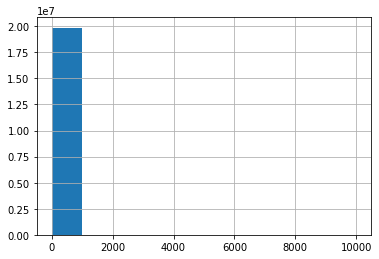

In [24]:
df.fare.hist()

In [27]:
df.describe()

,taxi_id,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,company
count,19863224.000,19862942.000,19865925.000,19865857.000,19865857.000,19865857.000,19865857.000,19865857.000,12230263.000
mean,4372.711,767.016,3.394,13.890,1.645,0.003,1.040,16.629,89.169
std,2524.755,1060.415,22.596,25.390,2.920,0.564,20.718,34.140,36.004
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
25%,2216.000,300.000,0.100,6.250,0.000,0.000,0.000,7.400,92.000
50%,4349.000,540.000,1.100,8.500,0.000,0.000,0.000,10.000,107.000
75%,6570.000,900.000,2.700,14.250,2.000,0.000,1.000,16.500,107.000
max,8762.000,86399.000,3353.100,9999.000,496.500,999.990,9993.410,9999.000,119.000


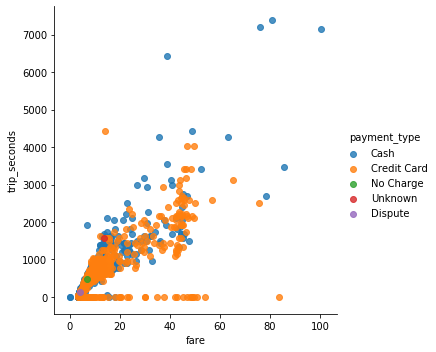

In [30]:
sns.lmplot(data=df.sample(1000),x='fare',y='trip_seconds',fit_reg=False,hue='payment_type')